Columns in the dataset:
 Index(['Name', 'Aired Date', 'Year of release', 'Original Network', 'Aired On',
       'Number of Episodes', 'Duration', 'Content Rating', 'Rating',
       'Synopsis', 'Genre', 'Tags', 'Director', 'Screenwriter', 'Cast',
       'Production companies', 'Rank'],
      dtype='object')
Selected Features:  ['Rating', 'Number of Episodes']
Initial Clusters:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Final Clusters after 5 epochs:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 

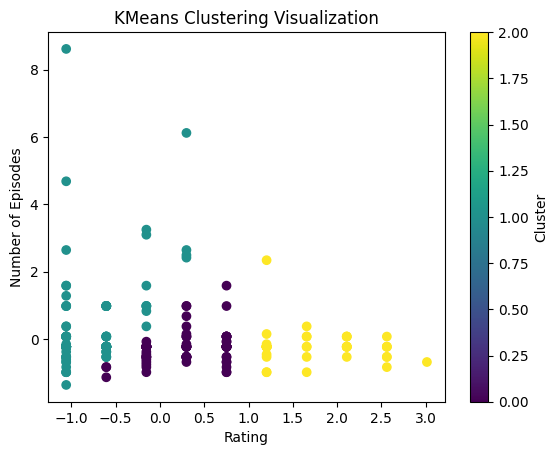

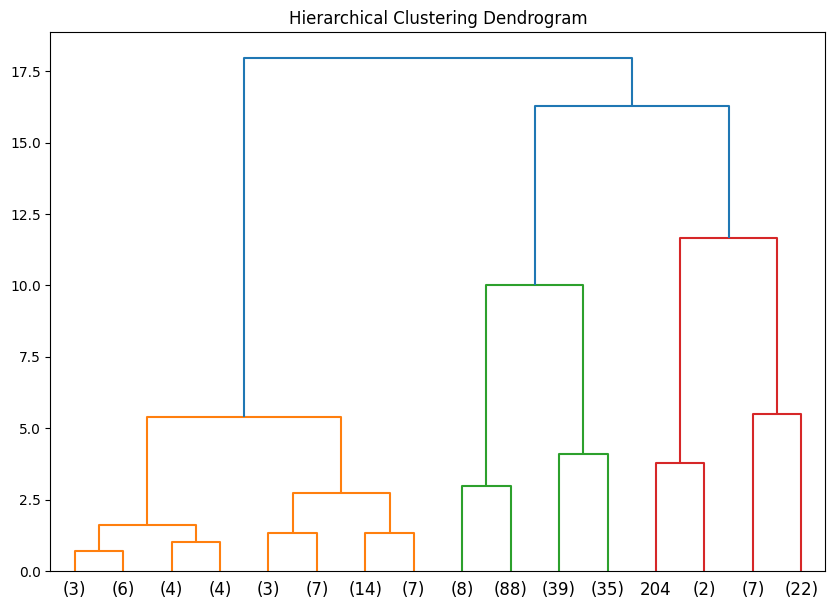

Silhouette Score: 0.34808273936548145
Enter cluster number (0 - Moderately Rated, 1 - Lower Rated, 2 - Highly Rated) to get recommendations: 2
Generating recommendations for cluster: Highly Rated

Generated Recommendations using Q-learning for Cluster 'Highly Rated':
Title                                    Rating     Synopsis
--------------------------------------------------------------------------------
Beyond Evil                              8.8        Meet the two fearless men willing to go to extreme lengths in their pursuit of a serial killer that has shaken up their quiet city:
Taxi Driver                              8.8        Do Gi has lived more honestly than anyone else as an officer in the Special Forces. Yet, when a serial killer murders his mother, he spends his days in agony. While feeling wronged and broken, Do Gi meets Jang Sung Chul, who recruits Do Gi to work for his company, Rainbow Taxi. Far from an ordinary taxi service, Rainbow Taxi is a secret organization th

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import numpy as np
import random

# Load the dataset (Update the file path if necessary)
file_path = '/content/drive/MyDrive/Drama_List/kdrama.csv'  # Replace this with your file path
data = pd.read_csv(file_path)

# Step 1: Inspect dataset columns
print("Columns in the dataset:\n", data.columns)

# Step 2: Choose relevant features for clustering based on your dataset
features = ['Rating', 'Number of Episodes']  # Update this based on your needs
print("Selected Features: ", features)

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Step 4: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans.fit(scaled_data)

# Initial clusters
initial_clusters = kmeans.labels_
print("Initial Clusters:\n", initial_clusters)

# Step 5: Find final clusters and error rate
epochs = kmeans.n_iter_
final_clusters = kmeans.labels_
error_rate = kmeans.inertia_  # Sum of squared distances to the closest centroid

print(f"Final Clusters after {epochs} epochs:\n", final_clusters)
print(f"Error Rate: {error_rate}")

# Step 6: Visualizing KMeans Clustering
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=final_clusters, cmap='viridis')
plt.title("KMeans Clustering Visualization")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Hierarchical Clustering
Z = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=3, labels=data.index)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Silhouette Score to check clustering quality
sil_score = silhouette_score(scaled_data, final_clusters)
print(f"Silhouette Score: {sil_score}")

# Define moods for clusters
cluster_moods = {0: 'Moderately Rated', 1: 'Lower Rated', 2: 'Highly Rated'}

# QLearningPlaylist class definition
class QLearningPlaylist:
    def __init__(self, data, cluster, n_dramas=5):
        self.data = data
        self.cluster = cluster
        self.n_dramas = n_dramas
        self.q_table = {}  # Initialize Q-table for state-action pairs
        self.initialize_q_table()

    def initialize_q_table(self):
        """Initialize Q-table for each drama with random Q-values."""
        for drama_id in self.data.index:
            self.q_table[drama_id] = random.uniform(0, 1)  # Random Q-value initialization

    def update_q_value(self, drama_id, reward, learning_rate=0.1, discount_factor=0.95):
        """Update Q-values using the Q-learning formula."""
        old_q_value = self.q_table[drama_id]
        max_next_q = max(self.q_table.values())  # Max future reward
        # Q-learning update rule
        self.q_table[drama_id] = old_q_value + learning_rate * (reward + discount_factor * max_next_q - old_q_value)

    def generate_recommendation(self):
        """Generate a list of top K-Dramas using Q-learning."""
        recommended_dramas = []
        available_dramas = list(self.data[final_clusters == self.cluster].index)  # Available dramas in the cluster

        for _ in range(self.n_dramas):
            if not available_dramas:
                break  # Stop if no more dramas are available

            # Select drama with max Q-value from the available dramas
            best_drama_id = max(available_dramas, key=lambda x: self.q_table[x])
            recommended_dramas.append(best_drama_id)

            # Remove the selected drama from available dramas to avoid repetition
            available_dramas.remove(best_drama_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = random.choice([1, -1])  # Simulated feedback
            self.update_q_value(best_drama_id, reward=feedback)

        recommendations = self.data.loc[recommended_dramas][['Name', 'Rating', 'Synopsis']]
        return recommendations

# Policy Gradient Implementation
class PolicyGradientRecommendation:
    def __init__(self, data, cluster, n_dramas=5):
        self.data = data
        self.cluster = cluster
        self.n_dramas = n_dramas
        self.policy_table = {drama_id: 1.0 for drama_id in self.data.index}  # Initial policy probabilities
        self.epsilon = 0.1  # Exploration factor

    def select_action(self):
        """Select a drama based on the policy."""
        available_dramas = list(self.data[final_clusters == self.cluster].index)
        total_prob = sum(self.policy_table[drama_id] for drama_id in available_dramas)
        probabilities = [self.policy_table[drama_id] / total_prob for drama_id in available_dramas]
        return np.random.choice(available_dramas, p=probabilities)

    def update_policy(self, drama_id, reward):
        """Update the policy using the reward."""
        old_value = self.policy_table[drama_id]
        self.policy_table[drama_id] = old_value + 0.01 * reward  # Simple update rule (learning rate = 0.01)

    def generate_recommendation(self):
        """Generate recommendations using the policy gradient approach."""
        recommended_dramas = []

        for _ in range(self.n_dramas):
            drama_id = self.select_action()
            recommended_dramas.append(drama_id)

            # Simulate user feedback (like = +1 reward, dislike = -1 reward)
            feedback = random.choice([1, -1])  # Simulated feedback
            self.update_policy(drama_id, feedback)

        recommendations = self.data.loc[recommended_dramas][['Name', 'Rating', 'Synopsis']]
        return recommendations

# Example usage:
user_input_cluster = int(input("Enter cluster number (0 - Moderately Rated, 1 - Lower Rated, 2 - Highly Rated) to get recommendations: "))
mood = cluster_moods.get(user_input_cluster, "Unknown Cluster")
print(f"Generating recommendations for cluster: {mood}")

# Q-learning based recommendations
q_learning = QLearningPlaylist(data, user_input_cluster)
q_learning_recommendations = q_learning.generate_recommendation()

# Policy Gradient based recommendations
policy_gradient = PolicyGradientRecommendation(data, user_input_cluster)
policy_gradient_recommendations = policy_gradient.generate_recommendation()

# Displaying recommendations in a better format
print(f"\nGenerated Recommendations using Q-learning for Cluster '{mood}':")
print(f"{'Title':<40} {'Rating':<10} {'Synopsis'}")
print("-" * 80)
for index, row in q_learning_recommendations.iterrows():
    print(f"{row['Name']:<40} {row['Rating']:<10} {row['Synopsis']}")

print(f"\nGenerated Recommendations using Policy Gradient for Cluster '{mood}':")
print(f"{'Title':<40} {'Rating':<10} {'Synopsis'}")
print("-" * 80)
for index, row in policy_gradient_recommendations.iterrows():
    print(f"{row['Name']:<40} {row['Rating']:<10} {row['Synopsis']}")
